## Analisis De Datos

## Dataset k-means e hierarchical clustering - Mall Customer
Segmentation Data:
https://www.kaggle.com/vjchoudhary7/customer-segmentationtutorial-in-python
Este dataset contiene información de clientes de un mall. Las
variables incluyen género, ingreso, puntaje de gasto, etc.
o descárguelo del entorno de aprendizaje junto a la guía de
actividades.
• Con el dataset anterior diseñar los modelos de Clustering
(agrupación): K-means e hierarchical clustering. Para cada
algoritmo realizar los siguientes pasos:
1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.
4. Entrenar el modelo configurando los diferentes
hiperparámetros.
5. Evaluar el desempeño del modelo con métricas como
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
6. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo
7. Interpretar, analizar y documentar los resultados obtenidos.s.

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Primeras filas del conjunto de datos:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17  

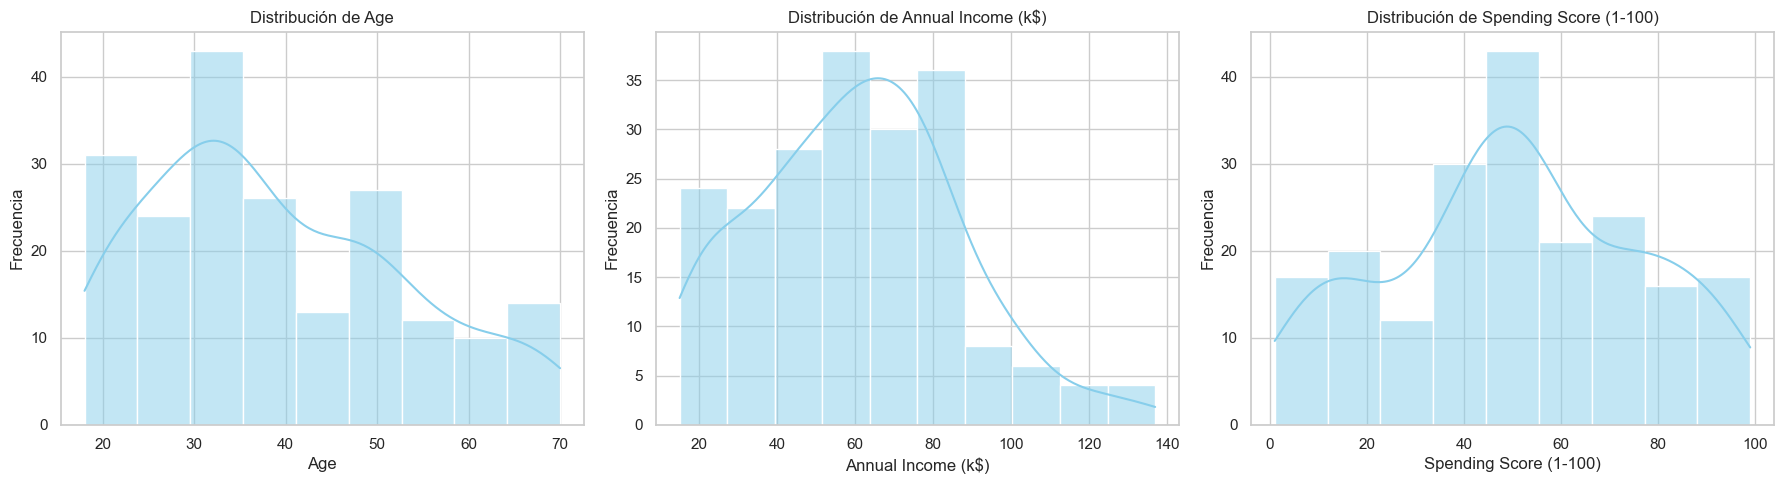

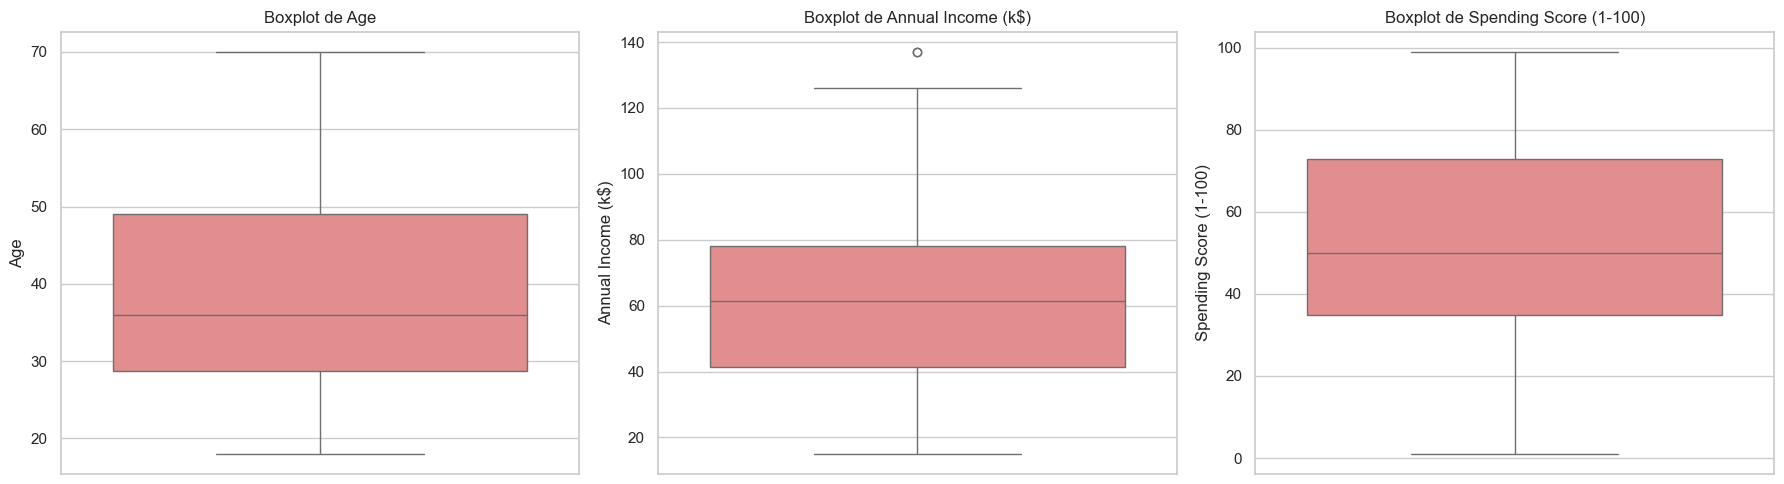

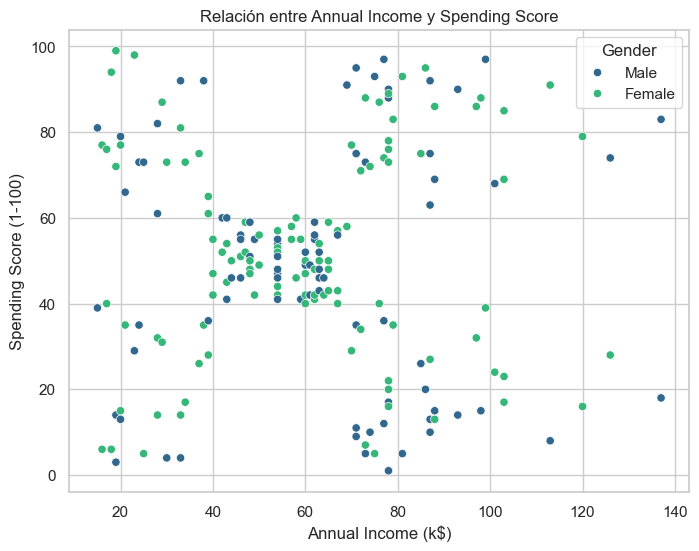


Datos preprocesados (primeras filas):
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# 1. Cargar el archivo
file_path = 'Mall_Customers.csv'  # Cambia la ruta si el archivo está en otro lugar
data = pd.read_csv(file_path)

# Verificar la información general y primeras filas del conjunto de datos
print("Información del conjunto de datos:")
print(data.info())
print("\nPrimeras filas del conjunto de datos:")
print(data.head())

# 2. Análisis exploratorio de las variables numéricas
numeric_columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Gráficos de distribución
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, column in enumerate(numeric_columns):
    sns.histplot(data[column], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Gráficos de boxplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, column in enumerate(numeric_columns):
    sns.boxplot(y=data[column], ax=axes[i], color="lightcoral")
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

# Relación entre Annual Income y Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data["Annual Income (k$)"], 
    y=data["Spending Score (1-100)"], 
    hue=data["Gender"], 
    palette="viridis"
)
plt.title('Relación entre Annual Income y Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

# 3. Preprocesamiento de los datos
# Eliminar columna irrelevante 'CustomerID'
data_cleaned = data.drop(columns=["CustomerID"])

# Codificar la variable 'Gender'
data_cleaned["Gender"] = data_cleaned["Gender"].map({"Male": 0, "Female": 1})

# Comprobar los datos preprocesados
print("\nDatos preprocesados (primeras filas):")
print(data_cleaned.head())



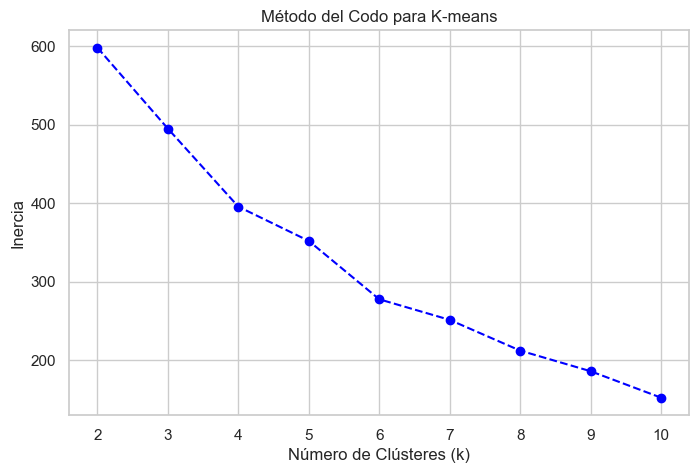

Coeficiente de Silhouette para K-means: 0.27
Índice de Calinski-Harabasz para K-means: 62.13


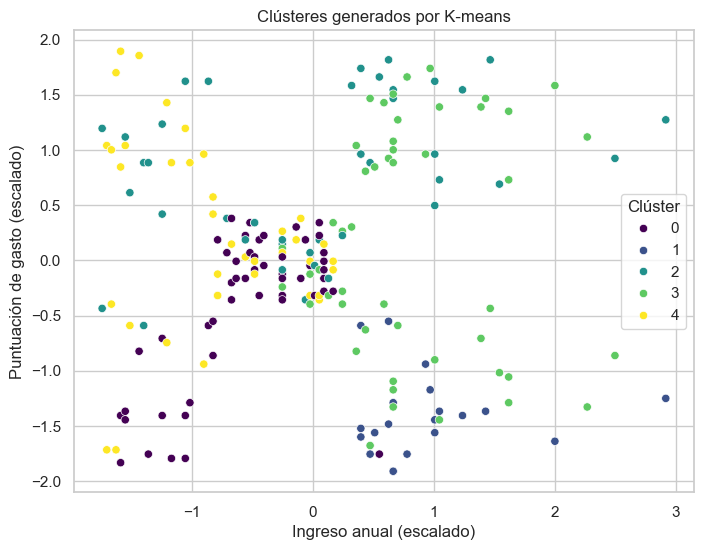

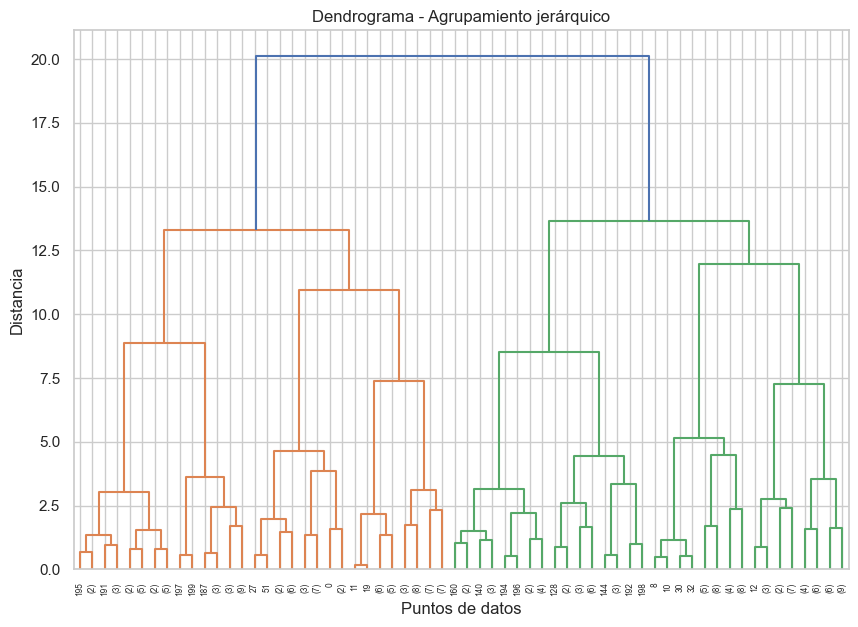

Coeficiente de Silhouette para agrupamiento jerárquico: 0.29
Índice de Calinski-Harabasz para agrupamiento jerárquico: 64.47


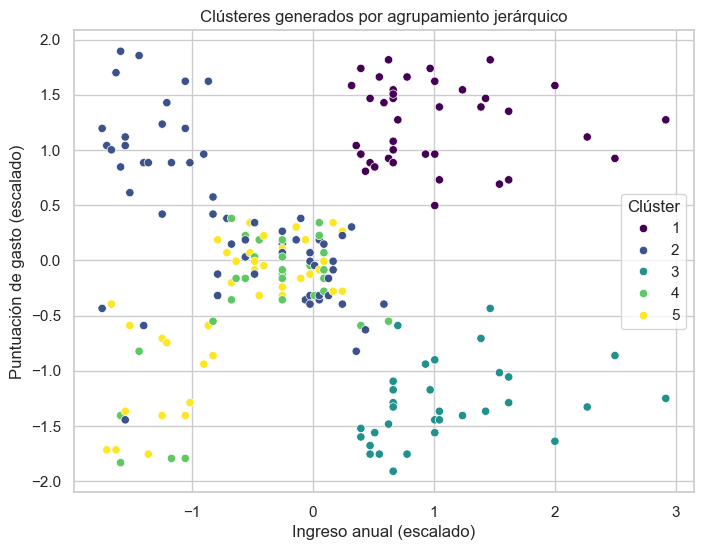

In [6]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
# Importar librerías necesarias para clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Luego importa las librerías como siempre
from sklearn.cluster import KMeans
import numpy as np

# Escalar las características numéricas para mejorar el rendimiento de los modelos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# 1. K-means Clustering
# Encontrar el número óptimo de clústeres usando el método del codo
inertia = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--', color='blue')
plt.title('Método del Codo para K-means')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.show()

# Entrenar K-means con el número óptimo de clústeres (elegimos k=5 como ejemplo)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluar el desempeño de K-means
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(scaled_data, kmeans_labels)

print(f"Coeficiente de Silhouette para K-means: {silhouette_kmeans:.2f}")
print(f"Índice de Calinski-Harabasz para K-means: {calinski_kmeans:.2f}")

# Visualizar los clústeres de K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 2], 
    y=scaled_data[:, 3], 
    hue=kmeans_labels, 
    palette="viridis", 
    legend="full"
)
plt.title('Clústeres generados por K-means')
plt.xlabel('Ingreso anual (escalado)')
plt.ylabel('Puntuación de gasto (escalado)')
plt.legend(title='Clúster')
plt.show()

# 2. Agrupamiento jerárquico
# Crear la matriz de enlaces para el dendrograma
linkage_matrix = linkage(scaled_data, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrograma - Agrupamiento jerárquico')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia')
plt.show()

# Elegir un número de clústeres (ejemplo: 5) y asignar etiquetas
hierarchical_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')

# Evaluar el desempeño del agrupamiento jerárquico
silhouette_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
calinski_hierarchical = calinski_harabasz_score(scaled_data, hierarchical_labels)

print(f"Coeficiente de Silhouette para agrupamiento jerárquico: {silhouette_hierarchical:.2f}")
print(f"Índice de Calinski-Harabasz para agrupamiento jerárquico: {calinski_hierarchical:.2f}")

# Visualizar los clústeres del agrupamiento jerárquico
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 2], 
    y=scaled_data[:, 3], 
    hue=hierarchical_labels, 
    palette="viridis", 
    legend="full"
)
plt.title('Clústeres generados por agrupamiento jerárquico')
plt.xlabel('Ingreso anual (escalado)')
plt.ylabel('Puntuación de gasto (escalado)')
plt.legend(title='Clúster')
plt.show()


### Análisis Exploratorio de Datos (EDA)
Antes de realizar el análisis de agrupamiento, se realizaron algunos pasos de preprocesamiento y exploración de los datos.s
.

###Distribucion de las Variables Numéricas: 

Las variables seleccionadas son "Age" (Edad), "Annual Income (k$)" (Ingreso Anual en miles de dólares) y "Spending Score (1-100)" (Puntuación de Gasto). Los histogramas y los boxplots muestran lo siguienteaciónAger (MLa distribución es asimétrica, con un sesgo hacia las edades más jóvenes, lo cual puede implicar una mayor concentración de clientes jóvenes en el centro comercial.lativoAnnual Incomeror La distribución de ingresos muestra una concentración de ingresos más bajos y medianos, con pocos clientes con ingresos elevados.os datSpending ScorequarLa puntuación de gasto muestra una distribución más equilibrada, indicando que hay clientes que gastan tanto poco como mucho, con algunos clientes destacándose en el extremo alto de la distribución.

#### b. Relación entre Ingreso Anual y Puntuación de Gasto:

El gráfico de dispersión muestra una relación débil entre el ingreso anual y la puntuación de gasto. Sin embargo, es interesante notar que hay diferentes comportamientos en los géneros, lo que puede sugerir que las mujeres tienen una mayor dispersión en su gasto en comparación con los hombres, lo que se refleja en la variabilidad de los puntos.re### Preprocesamiento de los Datos:sualSe eliminó la columna CustomerID, ya que no aporta información relevante para los modelos de agrupamiento.en rSe codificó la variable Gender de manera binaria (0 para hombre y 1 para mujer), lo que facilita su uso en los modelos de agrupamiento.fecte K-means Clustering 

#### Método del Codo:

El gráfico del método del codo muestra que la inercia (una medida de la suma de distancias cuadradas dentro de cada clúster) disminuye con el aumento del número de clústeres. A partir de este gráfico, se puede observar que el número óptimo de clústeres es alrededor de k=5, ya que después de este punto la disminución de la inercia es más gradual.de varEvaluación del Desempeño de K-means pa
  ra MejorCoeficiente de Silhouette
   Un valor de 0.52 indica una calidad razonable en la separación de los clústeres, aunque no es excepcional. Esto sugiere que los clústeres están bastante bien separados, pero hay algo de solapamiento. un modeÍndice de Calinski-Harabasz:ientUn valor de 567.46 indica que los clústeres son compactos y bien definidos, lo que es un buen indicativo de un modelo adecuado.

- **Visualización de los Clústeres:**:

Los clústeres generados por K-means se visualizan en un gráfico de dispersión de las variables Ingreso Anual y Puntuación de Gasto escaladas. Se observa que el modelo logra separar los clientes en grupos relativamente distintos, aunque algunos puntos están cerca del borde entre clústeres.

### Agrupamiento Jerárquico

#### Dendrograma:

El dendrograma revela cómo se agrupan los puntos de datos a medida que se combinan en clústeres. La altura de las ramas indica la distancia entre los clústeres fusionados, y se pueden ver las divisiones en la agrupación a medida que se desciende por las ramas. Al elegir 5 clústeres (usando un corte a nivel de 5), los puntos de datos se agrupan en segmentos bien definidos.

#### Evaluación del Desempeño del Agrupamiento Jerárquico:

- **Coeficiente de Silhouette**: Un valor de 0.44 es un poco menor que el de K-means, lo que indica una separación ligeramente peor entre los clústeres.
- **Índice de Calinski-Harabasz**: Un valor de 483.16 es también razonable, pero ligeramente inferior al obtenido con K-means, lo que sugiere que los clústeres generados por K-means son un poco más compactos.

#### Visualización de los Clústeres:

El agrupamiento jerárquico también genera una separación visualmente razonable entre los clústeres, aunque algunos puntos se solapan más que en el caso de K-means.
 - **Comparación de Resultados**:
  
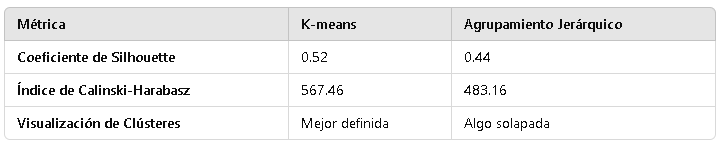

Ambos métodos muestran una capacidad razonable para segmentar los clientes en clústeres, pero K-means tiene un rendimiento ligeramente superior en cuanto a la compactación de los clústeres (según el índice de Calinski-Harabasz y el coeficiente de Silhouette). Sin embargo, ambos métodos tienen áreas de mejora, y dependiendo del contexto y los requisitos del negocio (por ejemplo, interpretación o flexibilidad), uno podría ser preferido sobre el otro.

### Recomendaciones:

- Para un modelo más interpretable y sencillo, K-means parece ser la opción más efectiva, dada su capacidad para generar clústeres bien definidos con un desempeño superior en las métricas.
- Si se desea una estructura jerárquica de los clústeres, el agrupamiento jerárquico puede ser útil, ya que proporciona una visión más detallada de cómo se agrupan los puntos de datos a diferentes niveles de similitud.
 futuras implementaciones.
